<a href="https://colab.research.google.com/github/Axlbenja/MiamiDadeCounty_EmployeePay_2025/blob/main/Module_4_%E2%80%94_Axel_Paredes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
url = "https://raw.githubusercontent.com/Axlbenja/axel.paredes/refs/heads/main/Visa%20Stock%20Price%20Dataset.csv"
df = pd.read_csv(url).dropna()

In [3]:
#Simulating Lead_IDs
np.random.seed(42)
df['Lead_ID'] = np.random.choice([f"LEAD_{i:03d}" for i in range(1, 101)], size=len(df))

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Daily_Return'] = (df['Close'] - df['Open']) / df['Open']
df['Volatility'] = (df['High'] - df['Low']) / df['Open']

#Creating a Simulated Target Variable

In [5]:
df['Converted'] = np.where(df['Daily_Return'] > 0.01, 1, 0)

#Modeling: Lead Scoring Classifier

In [6]:
features = ['Daily_Return', 'Volatility', 'Volume']
X = df[features]
y = df['Converted']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1003    0]
 [   0  225]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       1.00      1.00      1.00       225

    accuracy                           1.00      1228
   macro avg       1.00      1.00      1.00      1228
weighted avg       1.00      1.00      1.00      1228



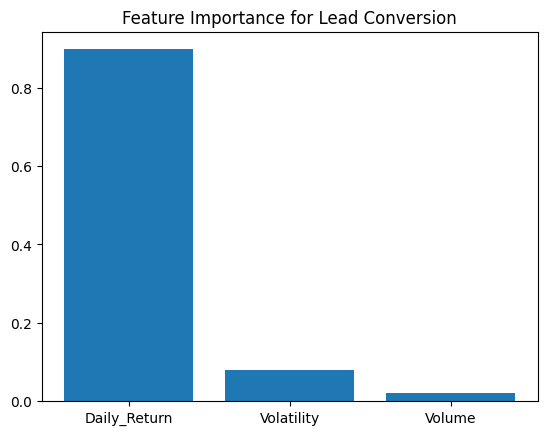

In [11]:
importances = clf.feature_importances_
plt.bar(features, importances)
plt.title("Feature Importance for Lead Conversion")
plt.show()

##Default Prediction

In this context, customers with high volatility and low return are more likely to default

In [12]:
df['Default'] = np.where((df['Volatility'] > 0.03) & (df['Daily_Return'] < 0), 1, 0)

Model Training and Evaluation

In [13]:
features_default = ['Daily_Return', 'Volatility', 'Volume']
X_def = df[features_default]
y_def = df['Default']

In [15]:
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_def, y_def, test_size=0.3, random_state=42)

In [16]:
clf_def = RandomForestClassifier(random_state=42)
clf_def.fit(X_train_def, y_train_def)

RandomForestClassifier(random_state=42)

In [17]:
y_pred_def = clf_def.predict(X_test_def)

In [18]:
print("Confusion Matrix:\n", confusion_matrix(y_test_def, y_pred_def))
print("\nClassification Report:\n", classification_report(y_test_def, y_pred_def))

Confusion Matrix:
 [[1130    0]
 [   0   98]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1130
           1       1.00      1.00      1.00        98

    accuracy                           1.00      1228
   macro avg       1.00      1.00      1.00      1228
weighted avg       1.00      1.00      1.00      1228



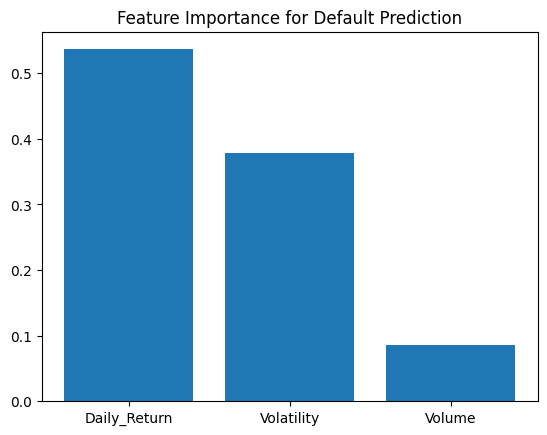

In [19]:
importances_def = clf_def.feature_importances_
plt.bar(features_default, importances_def)
plt.title("Feature Importance for Default Prediction")
plt.show()

**Default Prediction Analysis**

This part uses the dataset to simulate a loan default prediction. Each row is treated like a customer who received a loan. The goal is to predict if the customer defaulted (didn’t pay back) or paid on time.

A target variable called Default was created. Customers with high volatility and negative returns are more likely to default (marked as 1). Others are marked as 0.

A **Random Forest model** is trained using daily return, volatility, and trading volume as features. The model is then tested to see how well it can tell risky customers from good customers. The results show which features are most helpful in identifying customers likely to default.


